In [1]:
!pip install easyocr

     ---------------------------------------- 2.9/2.9 MB 871.5 kB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 1.5 MB/s eta 0:00:00
     -------------------------------------- 108.2/108.2 kB 6.5 MB/s eta 0:00:00
     -------------------------------------- 313.0/313.0 kB 4.8 MB/s eta 0:00:00
     -------------------------------------- 156.5/156.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 38.8/38.8 MB 2.0 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from IPython.display import Image

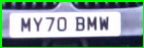

In [6]:
Image("C:\\Users\\Pratham srivastava\\OneDrive - Sikkim Manipal University\\Desktop\\Car-Number-Plates-Detection-main\\plates\\scaned_img_0.jpg")

In [5]:

reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [32]:
output=reader.readtext('C:\\Users\\Pratham srivastava\\OneDrive - Sikkim Manipal University\\Desktop\\Car-Number-Plates-Detection-main\\plates\\pic.jpg')
output

[([[290, 132], [320, 132], [320, 164], [290, 164]], 'R', 0.9981139263138381),
 ([[247, 167], [367, 167], [367, 183], [247, 183]],
  'Prescription Medical',
  0.9951651408755936),
 ([[245, 183], [371, 183], [371, 201], [245, 201]],
  'TAKE ONE TABLET DY',
  0.5649320300759116),
 ([[249, 201], [369, 201], [369, 217], [249, 217]],
  'MOUTH EVERY DAY',
  0.8481495208681311),
 ([[307, 217], [339, 217], [339, 231], [307, 231]],
  'Refille',
  0.6351851149742487)]

In [9]:
output

[([[16, 12], [112, 12], [112, 36], [16, 36]], 'HY7O BMW', 0.188936846056334)]

In [33]:
cord = output[-1][0]

In [34]:
cord

[[307, 217], [339, 217], [339, 231], [307, 231]]

In [35]:
a = list(zip(*cord))
a

[(307, 339, 339, 307), (217, 217, 231, 231)]

In [36]:
min(a[0])

307

In [37]:
min(a[1])

217

In [38]:
max(a[0])

339

In [39]:
max(a[1])

231

In [40]:

x_min, y_min = [int(min(idx)) for idx in zip(*cord)]

In [41]:
x_min, y_min

(307, 217)

In [42]:

x_max, y_max = [int(max(idx)) for idx in zip(*cord)]

In [43]:
x_max, y_max

(339, 231)

In [44]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 30

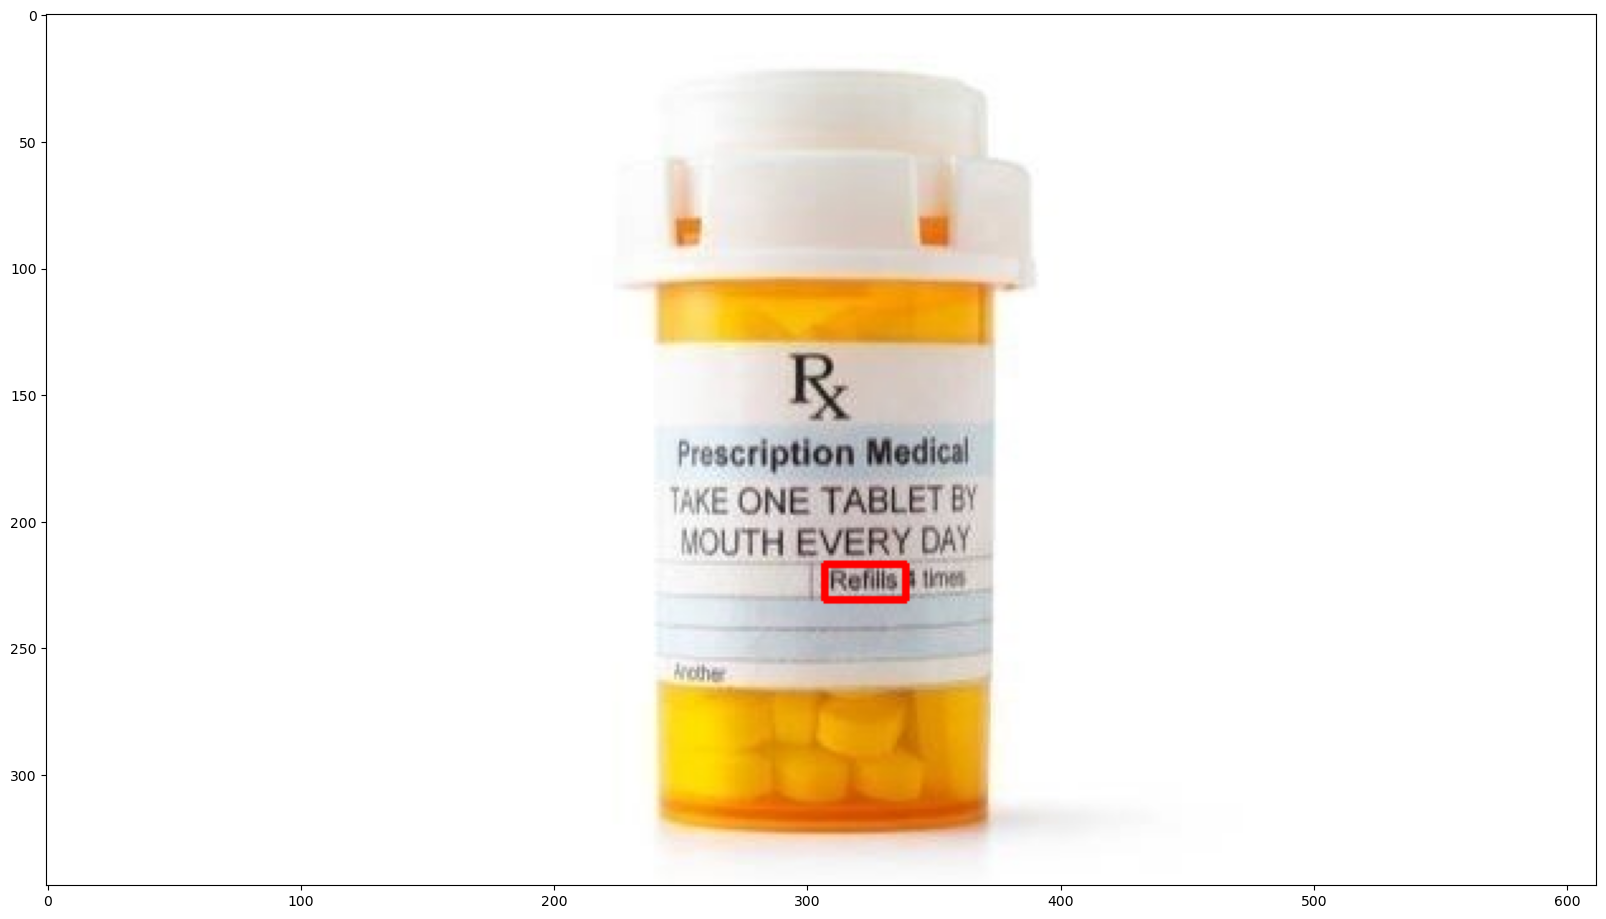

In [45]:
image = cv2.imread('C:\\Users\Pratham srivastava\\OneDrive - Sikkim Manipal University\\Desktop\\Car-Number-Plates-Detection-main\\plates\\pic.jpg')
cv2.rectangle(image,(x_max,y_max),(x_min,y_min),(0,0,255),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


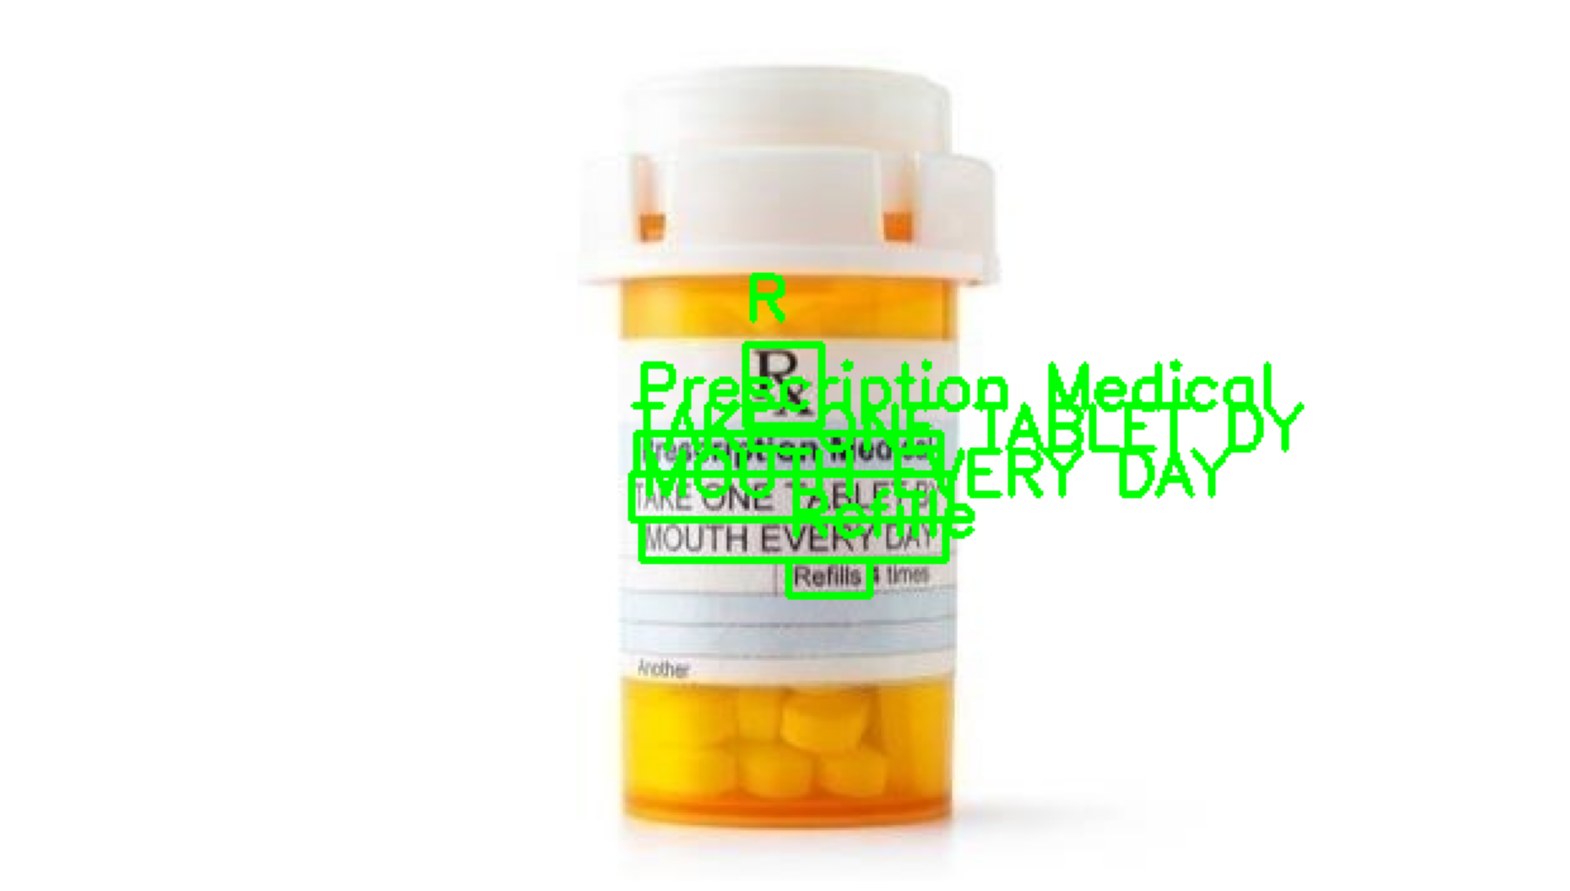

Detected Text:
R (Confidence: 1.00)
Prescription Medical (Confidence: 1.00)
TAKE ONE TABLET DY (Confidence: 0.56)
MOUTH EVERY DAY (Confidence: 0.85)
Refille (Confidence: 0.64)


In [28]:
import matplotlib.pyplot as plt
import cv2
import easyocr
import numpy as np

# Initialize the OCR reader
reader = easyocr.Reader(['en'])

# Read the image
image_path = ('C:\\Users\\Pratham srivastava\\OneDrive - Sikkim Manipal University\\Desktop\\Car-Number-Plates-Detection-main\\plates\\pic.jpg')
image = cv2.imread(image_path)

# Perform OCR
results = reader.readtext(image_path)

# Function to draw boxes around text
def draw_boxes(image, results, color=(0, 255, 0), thickness=2):
    for (bbox, text, prob) in results:
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))
        
        cv2.rectangle(image, top_left, bottom_right, color, thickness)
        cv2.putText(image, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

# Draw boxes on the image
draw_boxes(image, results)

# Display the image
plt.figure(figsize=(20, 30))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print detected text
print("Detected Text:")
for (bbox, text, prob) in results:
    print(f"{text} (Confidence: {prob:.2f})")

[([[290, 132], [320, 132], [320, 164], [290, 164]], 'R', 0.9981139263138381),
 ([[247, 167], [367, 167], [367, 183], [247, 183]],
  'Prescription Medical',
  0.9951651408755936),
 ([[245, 183], [371, 183], [371, 201], [245, 201]],
  'TAKE ONE TABLET DY',
  0.5649320300759116),
 ([[249, 201], [369, 201], [369, 217], [249, 217]],
  'MOUTH EVERY DAY',
  0.8481495208681311),
 ([[307, 217], [339, 217], [339, 231], [307, 231]],
  'Refille',
  0.6351851149742487)]